## Project 2 TAA Blog

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Processing the data

In [2]:
df = pd.read_csv('housepricedata.csv')
dataset = df.values

X = dataset[:,:-1]
Y = dataset[:,-1]


In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [4]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


### Blog NN 

In [5]:
from keras.models import Sequential
from keras.layers import Dense

2022-06-28 15:23:01.356935: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 15:23:01.356958: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


#### Define architecture

In [6]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

2022-06-28 15:23:03.209946: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 15:23:03.209996: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 15:23:03.210022: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vicente): /proc/driver/nvidia/version does not exist
2022-06-28 15:23:03.210267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 12ms/step - loss: 0.6761 - accuracy: 0.5088 - val_loss: 0.6789 - val_accuracy: 0.4749
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6710 - accuracy: 0.5088 - val_loss: 0.6740 - val_accuracy: 0.4795
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.5127 - val_loss: 0.6696 - val_accuracy: 0.4886
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.5431 - val_loss: 0.6654 - val_accuracy: 0.5114
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.5744 - val_loss: 0.6612 - val_accuracy: 0.5525
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6311 - val_loss: 0.6572 - val_accuracy: 0.5936
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6480 - accuracy: 0.6389 - val_loss: 0.6529 - val_accuracy: 0.6301
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8718 - val_loss: 0.3484 - val_accuracy: 0.8539
Epoch 60/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8728 - val_loss: 0.3465 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8738 - val_loss: 0.3417 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8728 - val_loss: 0.3404 - val_accuracy: 0.8539
Epoch 63/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8777 - val_loss: 0.3373 - val_accuracy: 0.8676
Epoch 64/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3114 - accuracy: 0.8767 - val_loss: 0.3363 - val_accuracy: 0.8539
Epoch 65/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.8748 - val_loss: 0.3333 - val_accuracy: 0.8676
Epoch 

In [9]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8950


0.8949771523475647

### Loss visualization

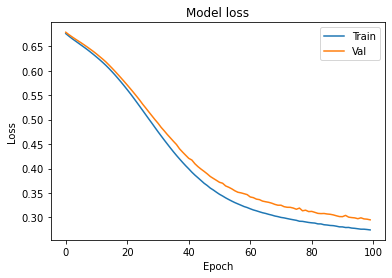

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

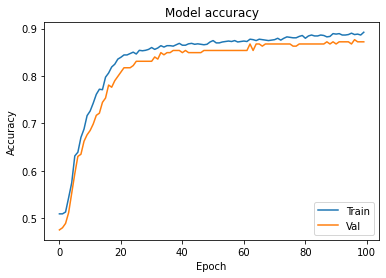

In [11]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Add Regularization

In [12]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 2s 28ms/step - loss: 0.4327 - accuracy: 0.8072 - val_loss: 0.3522 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3212 - accuracy: 0.8650 - val_loss: 0.3327 - val_accuracy: 0.8539
Epoch 3/100
32/32 [==============================] - 1s 32ms/step - loss: 0.3600 - accuracy: 0.8405 - val_loss: 0.3415 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 30ms/step - loss: 0.2843 - accuracy: 0.8894 - val_loss: 0.3122 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 33ms/step - loss: 0.2582 - accuracy: 0.8963 - val_loss: 0.2775 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2700 - accuracy: 0.8816 - val_loss: 0.2826 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 34ms/step - loss: 0.2574 - accuracy: 0.8933 - val_loss: 0.2955 - val_accuracy: 0.8767
Epoch 

32/32 [==============================] - 1s 33ms/step - loss: 0.1774 - accuracy: 0.9354 - val_loss: 0.3229 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 34ms/step - loss: 0.1587 - accuracy: 0.9344 - val_loss: 0.3041 - val_accuracy: 0.8904
Epoch 60/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1494 - accuracy: 0.9393 - val_loss: 0.3562 - val_accuracy: 0.8950
Epoch 61/100
32/32 [==============================] - 1s 29ms/step - loss: 0.1457 - accuracy: 0.9384 - val_loss: 0.3526 - val_accuracy: 0.8813
Epoch 62/100
32/32 [==============================] - 1s 38ms/step - loss: 0.1709 - accuracy: 0.9325 - val_loss: 0.3448 - val_accuracy: 0.8995
Epoch 63/100
32/32 [==============================] - 1s 32ms/step - loss: 0.1819 - accuracy: 0.9237 - val_loss: 0.3151 - val_accuracy: 0.8950
Epoch 64/100
32/32 [==============================] - 1s 39ms/step - loss: 0.1764 - accuracy: 0.9295 - val_loss: 0.3058 - val_accuracy: 0.8767
Epoch 65/100

In [13]:
model_2.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 6ms/step - loss: 0.5221 - accuracy: 0.9224


0.922374427318573

### Loss visualization

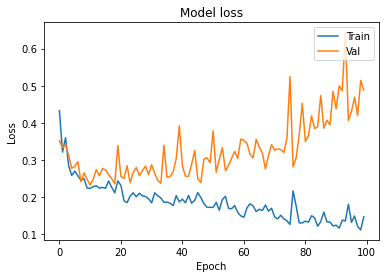

In [14]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

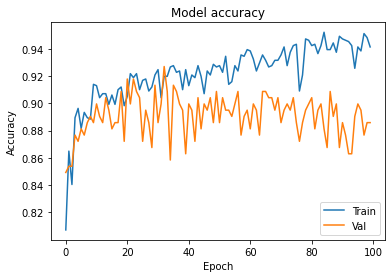

In [15]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Reduce Overfitting

In [16]:
from keras.layers import Dropout
from keras import regularizers

In [17]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))


Epoch 1/100
32/32 [==============================] - 3s 68ms/step - loss: 14.2318 - accuracy: 0.6184 - val_loss: 3.8981 - val_accuracy: 0.8174
Epoch 2/100
32/32 [==============================] - 2s 57ms/step - loss: 1.6584 - accuracy: 0.8356 - val_loss: 0.7065 - val_accuracy: 0.8493
Epoch 3/100
32/32 [==============================] - 2s 59ms/step - loss: 0.5590 - accuracy: 0.8718 - val_loss: 0.5472 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 2s 70ms/step - loss: 0.5119 - accuracy: 0.8630 - val_loss: 0.4971 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 2s 55ms/step - loss: 0.5472 - accuracy: 0.8434 - val_loss: 0.5089 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 2s 54ms/step - loss: 0.4837 - accuracy: 0.8757 - val_loss: 0.4767 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 2s 55ms/step - loss: 0.4986 - accuracy: 0.8669 - val_loss: 0.4906 - val_accuracy: 0.8539
Epoch

32/32 [==============================] - 1s 45ms/step - loss: 0.4388 - accuracy: 0.8796 - val_loss: 0.4182 - val_accuracy: 0.8858
Epoch 59/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4264 - accuracy: 0.8816 - val_loss: 0.4213 - val_accuracy: 0.8767
Epoch 60/100
32/32 [==============================] - 1s 34ms/step - loss: 0.4305 - accuracy: 0.8894 - val_loss: 0.4381 - val_accuracy: 0.8584
Epoch 61/100
32/32 [==============================] - 1s 41ms/step - loss: 0.4284 - accuracy: 0.8904 - val_loss: 0.4376 - val_accuracy: 0.8630
Epoch 62/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4320 - accuracy: 0.8875 - val_loss: 0.4282 - val_accuracy: 0.8767
Epoch 63/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4420 - accuracy: 0.8806 - val_loss: 0.4647 - val_accuracy: 0.8630
Epoch 64/100
32/32 [==============================] - 1s 47ms/step - loss: 0.4282 - accuracy: 0.8865 - val_loss: 0.4313 - val_accuracy: 0.8584
Epoch 65/100

In [18]:
model_3.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 16ms/step - loss: 0.4498 - accuracy: 0.8904


0.8904109597206116

### Loss visualization

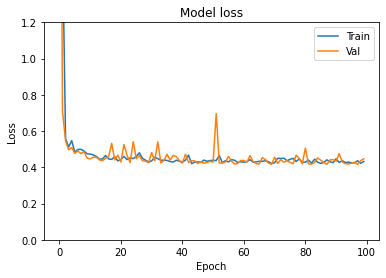

In [19]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

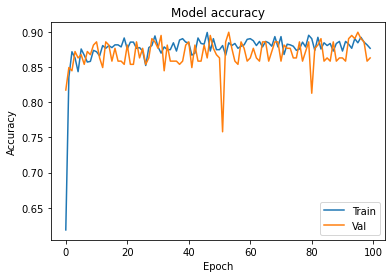

In [20]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()